In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
#Loading the Dataset
df=pd.read_csv('C:/Users/kiran/OneDrive/Desktop/EDA/Datasets/House Price India.csv')
df.head()

id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...        1909                0       122004   
1                       3  ...        1939                0       122004   
2                       3  ...        2001                0       122005   
3                       4  ...        1929                0       122006   
4                       4  ...        1951                0       122007   

   Lattitude  Longitude  living_area_renov  lot_area_renov  \
0    52.8878   -114.470               2470            4000   
1    52.8852   -114.468               2940            6600   
2    52.9532   -114.321               3350           42847   
3    52.9047   -114.485               2060            4500   
4    52.9133   -114.590               2380            4750   

   Number of schools nearby  Distance from the airport    Price  
0                         2                         51  1400000  
1                         1                         53  1200000  
2                         3                         76   838000  
3                         1                         51   805000  
4                         1                         67   790000  

[5 rows x 23 columns]

In [9]:
#checking for null values 
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [10]:
#checking for duplicate values 
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [id, Date, number of bedrooms, number of bathrooms, living area, lot area, number of floors, waterfront present, number of views, condition of the house, grade of the house, Area of the house(excluding basement), Area of the basement, Built Year, Renovation Year, Postal Code, Lattitude, Longitude, living_area_renov, lot_area_renov, Number of schools nearby, Distance from the airport, Price]
Index: []

[0 rows x 23 columns]


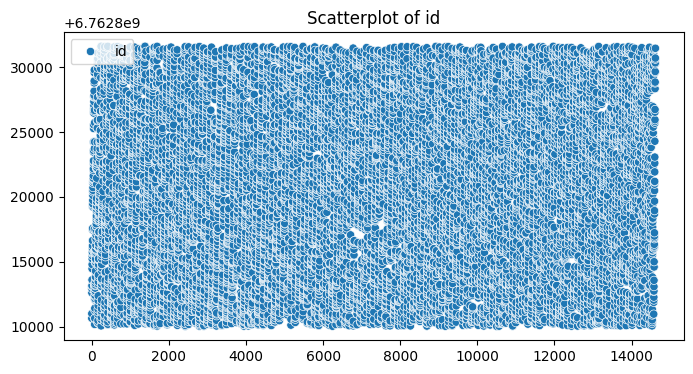

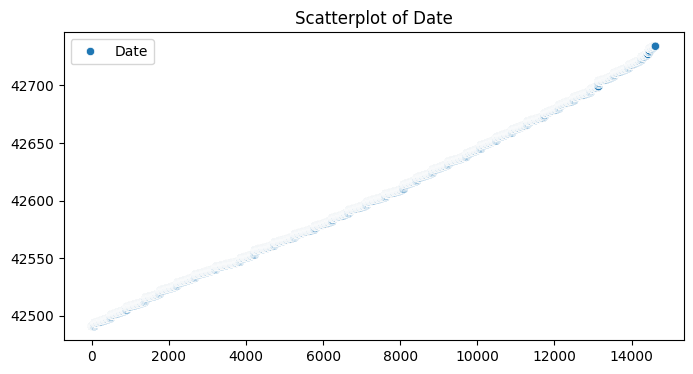

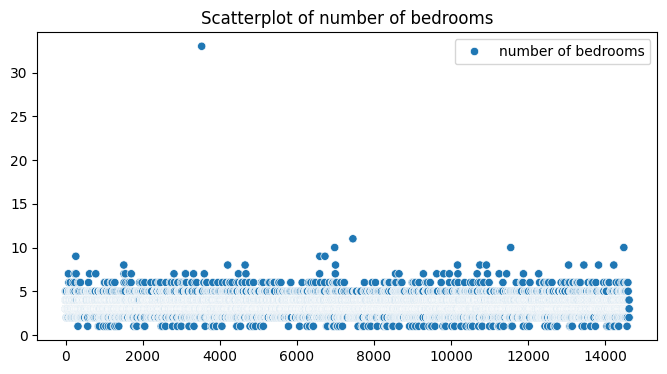

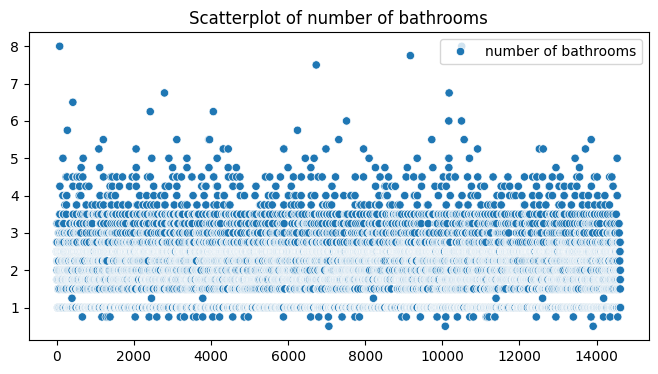

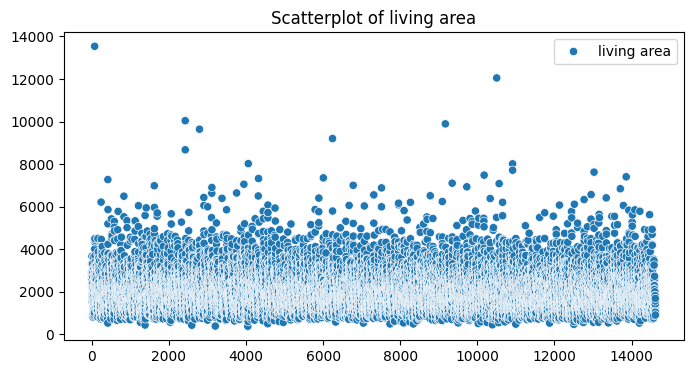

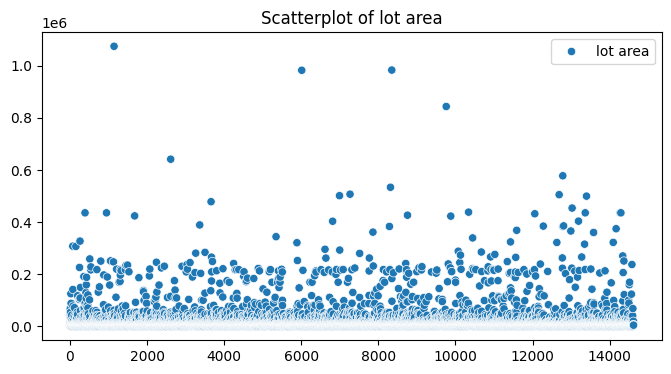

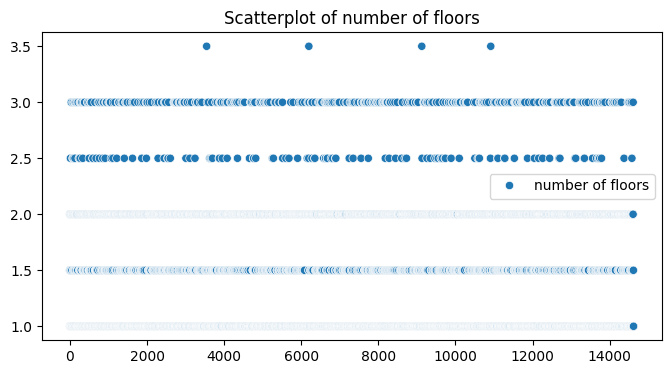

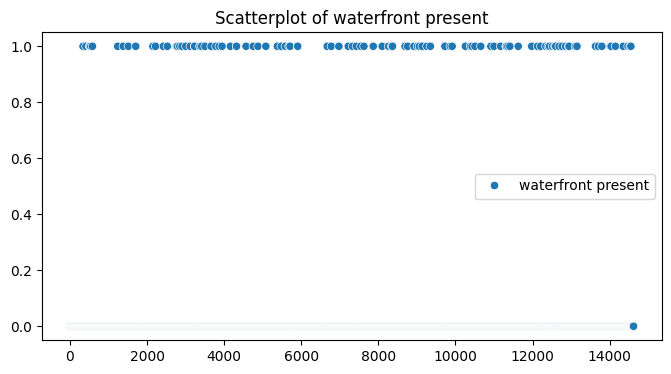

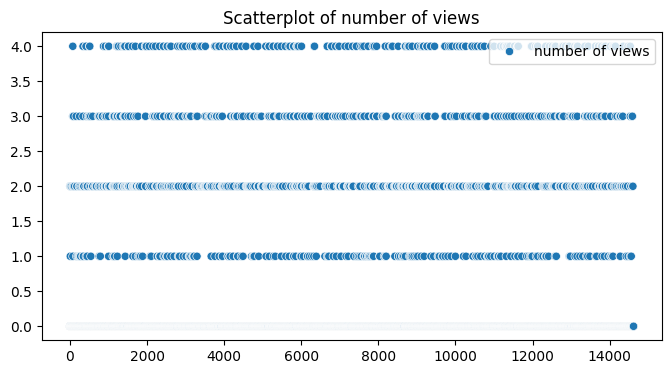

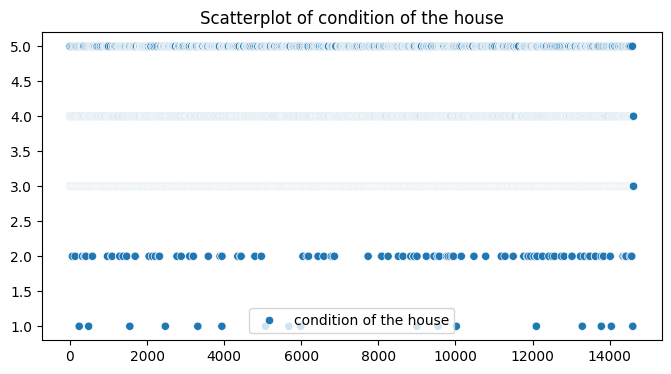

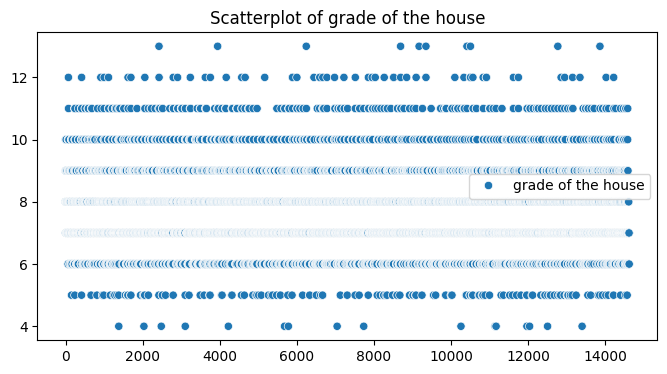

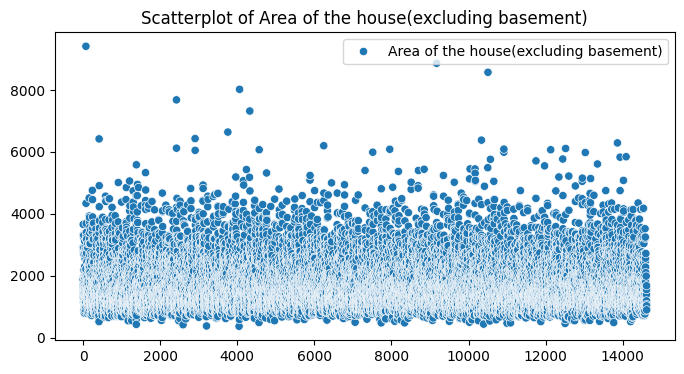

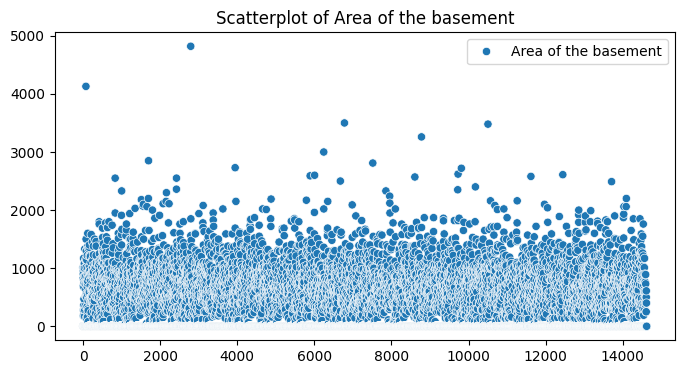

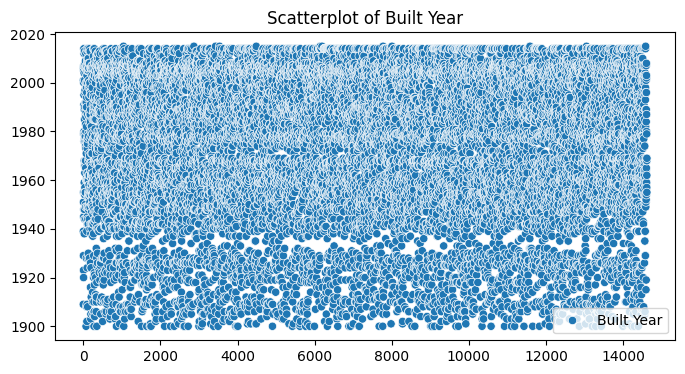

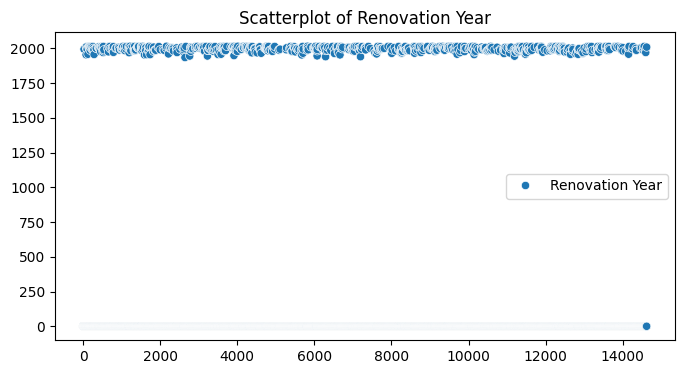

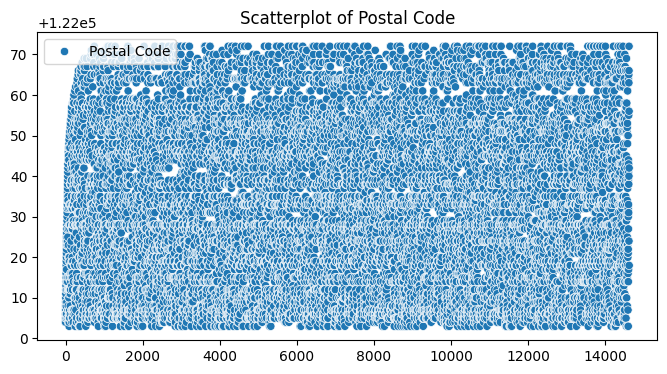

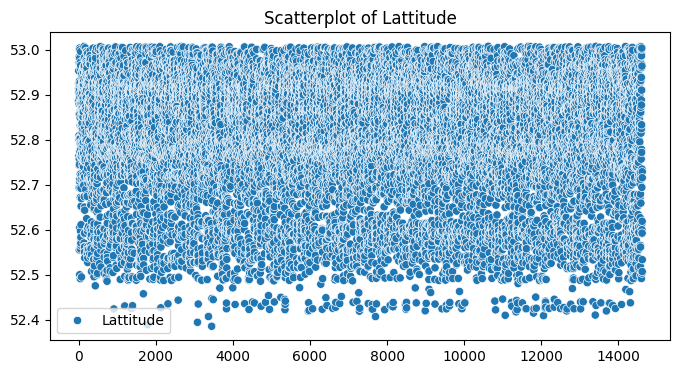

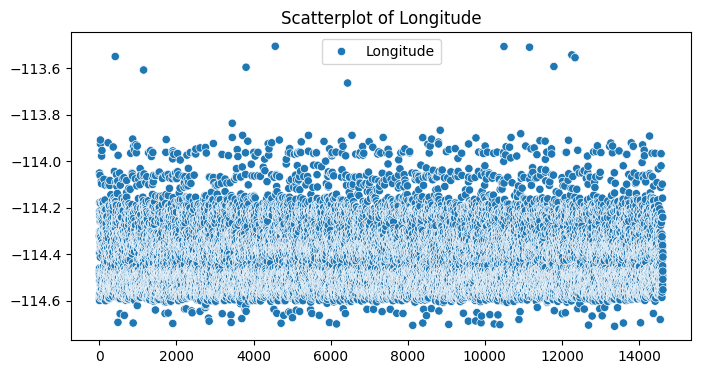

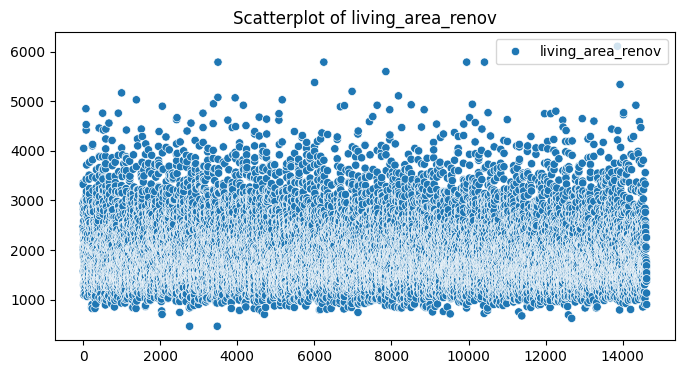

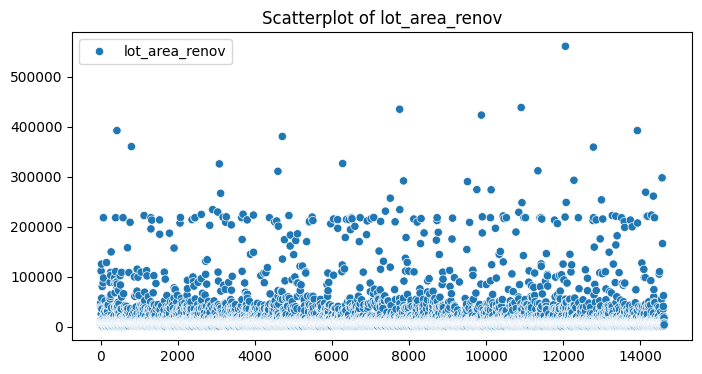

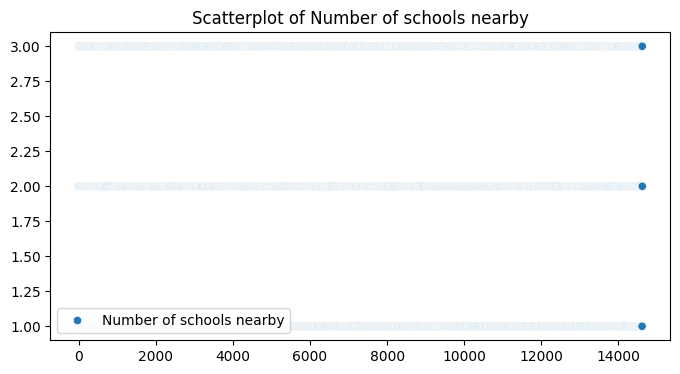

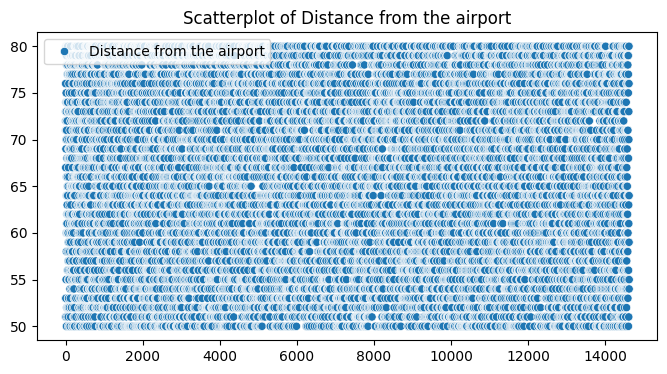

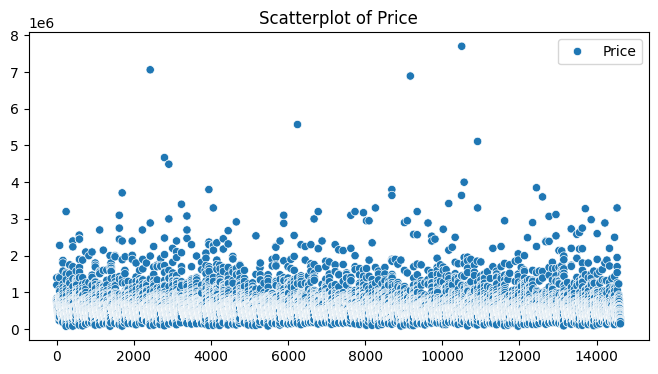

In [14]:
#checking for outliers using Boxplot 
for i in df.columns:
    plt.figure(figsize=(8, 4))  
    sns.scatterplot(data=df[[i]])  
    plt.title(f'Scatterplot of {i}')  
    plt.show()


In [15]:
#Removing outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows that have outliers
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]



In [16]:
#creating a copy scaled data : to check if model performance is better with scaled data 
df_scaled=df.copy()

In [27]:
scaler=StandardScaler()

X_scaled=df_scaled.drop(['Price','id'],axis=1)
y_scaled=df_scaled['Price']


X_scaled = scaler.fit_transform(X_scaled)


In [28]:
#Splitting the data 

X=df.drop(['Price','id'],axis=1)
y=df['Price']


X = scaler.fit_transform(X)

In [29]:
#Splitting the data 

X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)




In [41]:
#Model building 

model=LinearRegression()
model1=LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model1.fit(X_train_scaled,y_train_scaled)
y_pred_scaled = model.predict(X_test_scaled)



In [42]:
r2= r2_score(y_test, y_pred)

r2_scaled= r2_score(y_test_scaled, y_pred_scaled)





print(r2)
print(r2_scaled)


0.6642286381115434
0.6642286381115434
